# Observations

1) Only Ramicane and Capomulin significantly outperformed placebo in reducing tumor volume in this study. These two drugs reduced tumor volume by almost 50%, with less variance in tumor sizes compared to the other treatment regimen. 

2) Ramicane and Capomulin were more predictable treatment options with lower variance and SEM values. 

3) Tumor size and bodyweight have a moderate positive correlation. This is logical as tumors require large amounts of energy to support their rapid growth and heavier hosts would support larger tumors. 

4) This study had a well balanced demographic although for future studies I think it could be argued that the placebo group should have the fewer number of samples. 

# Importing csv files

In [1]:
# Dependencies and Setup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
MouseDataPath = "data/MouseData.csv"
StudyResultsPath = "data/StudyResults.csv"

# Read the mouse data and the study results
MouseData = pd.read_csv(MouseDataPath)
StudyResults = pd.read_csv(StudyResultsPath)

# Combine the data into a single dataset
DataSet = pd.merge(MouseData, StudyResults, how = "inner", on=["Mouse ID"])

# Merged Data Set

In [2]:
# Display merged data set
DataSet.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
UniqueMice = DataSet["Mouse ID"].unique()
NumMice = len(UniqueMice)
NumMice

249

In [4]:
#Duplicated data for "Mouse ID and Timepoint"
Dupes = DataSet[DataSet.duplicated(["Mouse ID", "Timepoint"])]
#showing duplicated data sources
Dupes

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
#Cleaning DataFrame by dropping the duplicated data
NoDupes = DataSet.drop_duplicates(["Mouse ID", "Timepoint"])
NoDupes

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
#double checking number of unique mice to ensure we did only removed duplicates
CleanedUniqueMice = NoDupes["Mouse ID"].unique()
len(CleanedUniqueMice)

#Proving that no unique mice were removed from the dataset
len(CleanedUniqueMice) == NumMice

True

# Summary Statistics Table

In [7]:
# Producing a summary statistics table
# Group dataset by the drug regimen
GroupedNoDupes = NoDupes.groupby("Drug Regimen")
SummaryTumorVol = GroupedNoDupes["Tumor Volume (mm3)"].describe()

In [8]:
TumorMean = GroupedNoDupes["Tumor Volume (mm3)"].mean()

In [9]:
TumorMedian = GroupedNoDupes["Tumor Volume (mm3)"].median()

In [10]:
TumorVariance = GroupedNoDupes["Tumor Volume (mm3)"].var()

In [11]:
TumorDeviation = GroupedNoDupes["Tumor Volume (mm3)"].std()

In [12]:
TumorSEM = GroupedNoDupes["Tumor Volume (mm3)"].sem()

In [13]:
SummaryDF = pd.DataFrame({"Mean":TumorMean,
                        "Median":TumorMedian, 
                        "Varience": TumorVariance,
                        "St. Dev": TumorDeviation,
                        "SEM":TumorSEM})
SummaryDF.index = SummaryDF.index.rename("Drug Regimen")

In [14]:
SummaryDF

,Mean,Median,Varience,St. Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Plotting Sample Size

In [15]:
#get the count of mice undergoing treatment in each drug regimen
PopByRegimen = GroupedNoDupes["Mouse ID"].nunique()
PopByRegimen

Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     25
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64

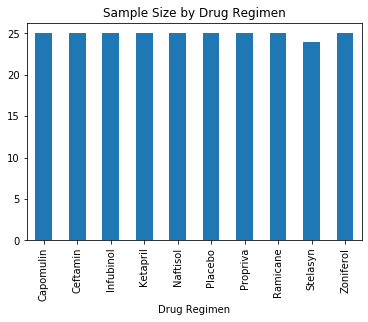

In [16]:
#Plotting using Pandas' 
PopByRegimen.plot.bar(x="Drug Regimen", y='Count',title='Sample Size by Drug Regimen')

Text(0, 0.5, 'Sample Size')

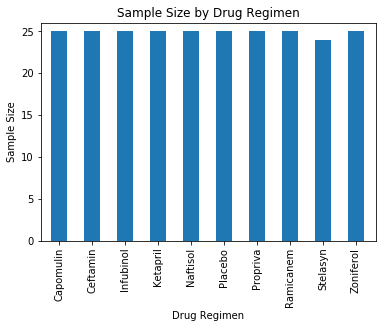

In [17]:
# Using Matplotlib 'pyplot'
y_axis = PopByRegimen.tolist()
x_axis = np.arange(len(PopByRegimen))
plt.bar(x_axis, y_axis, width = 0.5, alpha = 1, align = "center")
plt.xticks(x_axis, ["Capomulin",
                            "Ceftamin",
                            "Infubinol",
                            "Ketapril",
                            "Naftisol",
                            "Placebo",
                            "Propriva",
                            "Ramicanem",
                            "Stelasyn",
                            "Zoniferol"], rotation= 90,)
plt.xlim(-.55, len(x_axis)- 0.4)
plt.ylim(0, max(y_axis) + 1.)
plt.title("Sample Size by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Sample Size")

# Mouse Population by Gender

In [18]:
#Using Pandas 'DataFrame.plot()'
PopBySex = NoDupes.groupby("Sex")["Mouse ID"].nunique()
PopList = PopBySex.tolist()

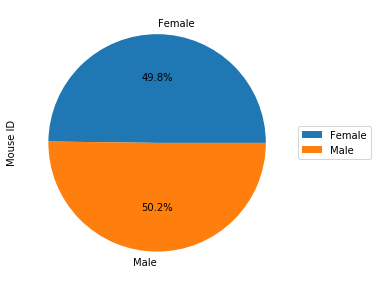

In [19]:
PopBySex.plot.pie(y= "Gender", figsize=(5, 5), autopct='%1.1f%%', startangle=0)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

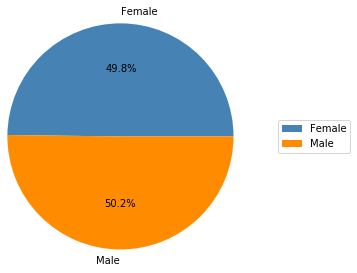

In [20]:
# Using Matplotlib 'pyplot'
labels = ["Female", "Male"]
colours = ["steelblue", "darkorange"]
plt.pie(PopList, labels = labels, colors = colours, autopct='%1.1f%%', startangle=0, radius = 1.3)
plt.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
plt.show()

# Last Timepoint Dataframe

In [21]:
# Get the maximum timepoint/last treatment
LastTimepoint = NoDupes.groupby("Mouse ID")["Timepoint"].max()

# Merge the two DataFrames on Mouse ID AND Timepoint to get a dataframe with last timepoint
MergedDF = pd.merge(NoDupes, LastTimepoint, on = ["Mouse ID", "Timepoint"])
MergedDF.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


# Identifying outlier ranges

In [22]:
#Need to calculate the maximum tumor volume across four treatment options: 
    #(Capomulin, Ramicane, Infubinol, and Ceftamin)
    
# Store the drugs in a list
TumorVols = []
drugList = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
#creating for loop to go through the highlighted drugs and identify outliers
for drug in drugList: 
    FinalTumorVolume = MergedDF.loc[MergedDF["Drug Regimen"] == drug, "Tumor Volume (mm3)"]

# add subset

    TumorVols.append(FinalTumorVolume)      
    
    dfQ3 = FinalTumorVolume.quantile(0.75)
    dfQ1 = FinalTumorVolume.quantile(0.25)
    IQR = dfQ3 - dfQ1
    UQR = dfQ3 + (IQR * 1.5) 
    LQR = dfQ1 - (IQR * 1.5)   
    
    outliers = FinalTumorVolume[(FinalTumorVolume < LQR) | (FinalTumorVolume > UQR)]
    print(outliers)    
    print(f' The lower quartile range of tumor size of mice on {drug} is {dfQ1}.')
    print(f' The upper quartile range of tumor size of mice on {drug} is {dfQ3}.')
    print(f' The interquartile range of tumor size of mice on {drug} is {IQR}.')
    print(f' For {drug} values above {UQR} are outliers.')
    print(f' For {drug} values below {LQR} are outliers.')
    print(f' There are {len(outliers)} outliers for mice treated by {drug}.')
    print()
 
    

Series([], Name: Tumor Volume (mm3), dtype: float64)
 The lower quartile range of tumor size of mice on Capomulin is 32.37735684.
 The upper quartile range of tumor size of mice on Capomulin is 40.1592203.
 The interquartile range of tumor size of mice on Capomulin is 7.781863460000004.
 For Capomulin values above 51.83201549 are outliers.
 For Capomulin values below 20.70456164999999 are outliers.
 There are 0 outliers for mice treated by Capomulin.

Series([], Name: Tumor Volume (mm3), dtype: float64)
 The lower quartile range of tumor size of mice on Ramicane is 31.56046955.
 The upper quartile range of tumor size of mice on Ramicane is 40.65900627.
 The interquartile range of tumor size of mice on Ramicane is 9.098536719999998.
 For Ramicane values above 54.30681135 are outliers.
 For Ramicane values below 17.912664470000003 are outliers.
 There are 0 outliers for mice treated by Ramicane.

74    36.321346
Name: Tumor Volume (mm3), dtype: float64
 The lower quartile range of tumor 

# Outlier Profile

In [23]:
#Pulling out outlier for analysis
OutlierID = MergedDF.iloc[74,]
OutlierID

Mouse ID                   c326
Drug Regimen          Infubinol
Sex                      Female
Age_months                   18
Weight (g)                   25
Timepoint                     5
Tumor Volume (mm3)      36.3213
Metastatic Sites              0
Name: 74, dtype: object

# Box plot with outliers

Text(0.5, 1.0, 'Final Tumor Volume by Drug Regimen')

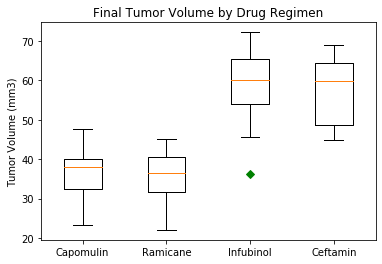

In [24]:
# Creating a box plot of the different tumor volumes
# Using Matplotlib, generate a box and whisker plot of the final 
# tumor volume for all four treatment regimens and highlight any
# potential outliers in the plot by changing their color and style.

plt.boxplot(TumorVols, 0, 'gD', labels = drugList)
plt.ylabel('Tumor Volume (mm3)')
plt.title('Final Tumor Volume by Drug Regimen')

# Mouse ID: 's185' complete dataset

In [25]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
CapData = NoDupes.loc[NoDupes["Drug Regimen"] == 'Capomulin']
CapData

CapData_s185 = CapData.loc[CapData["Mouse ID"] == 's185']
CapData_s185

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


# Mouse ID: 's185' Timepoint vs Tumor Volume (Bar)

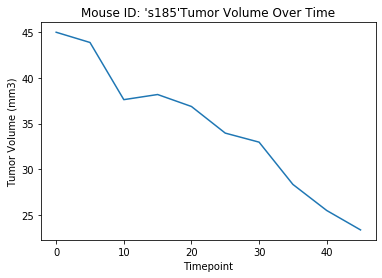

In [26]:
#Setting x and y values
x = CapData_s185["Timepoint"]
y = CapData_s185["Tumor Volume (mm3)"]
# creating the graph and labels
plt.plot(x, y)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Mouse ID: 's185'Tumor Volume Over Time")
plt.show()

# Capomulin Average Weight vs Tumor Volume (Scatter)

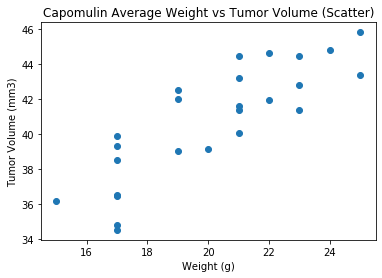

In [28]:
# Getting the average tumor volume for mice in Capomulin 
# Getting the average tumor volume for mice in Capomulin 
AvgCapMouse = CapData.groupby(['Mouse ID']).mean()
AvgCapMouse
x2 = AvgCapMouse['Weight (g)']
y2 = AvgCapMouse['Tumor Volume (mm3)']
plt.scatter(x2, y2)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Capomulin Average Weight vs Tumor Volume (Scatter)")
plt.show()

# Regression Line

The r-squared value is: 0.7088568047708717


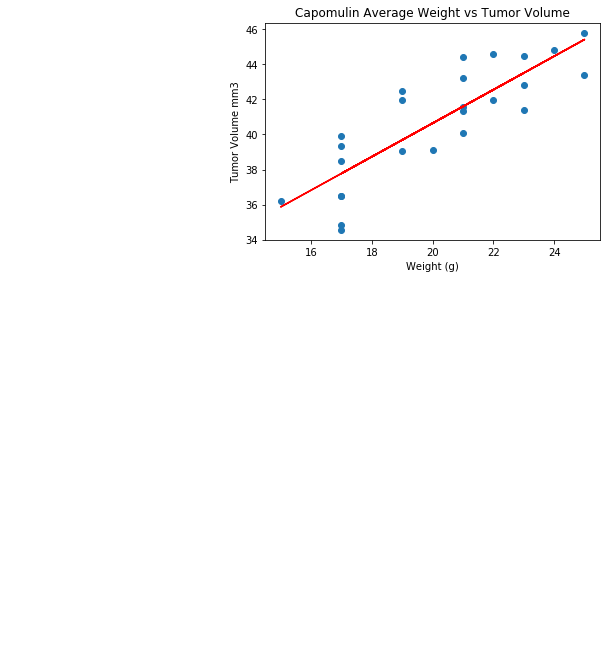

In [30]:
# Add the linear regression equation and line to plot
x_values = AvgCapMouse['Weight (g)']
y_values = AvgCapMouse['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume mm3')
plt.title("Capomulin Average Weight vs Tumor Volume")
print(f"The r-squared value is: {rvalue**2}")
plt.show()